In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('SolarPrediction.csv')

# Initial Observation

In [5]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [6]:
df.shape

(32686, 11)

In [8]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [10]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


Analyzing the correlation between variables

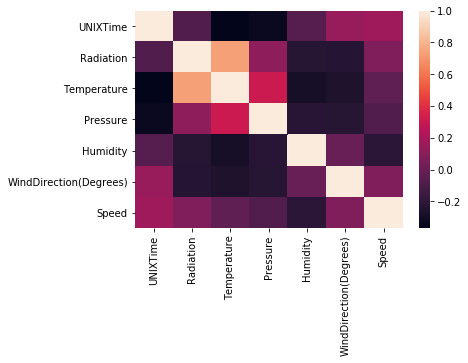

In [15]:
sns.heatmap(df.corr())
plt.show()

# Data Preprocessing

In [16]:
#Covert time to_datetime
#Add column 'hour'
df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour


In [17]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1900-01-01 23:55:26,23,9,2016,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1900-01-01 23:50:23,23,9,2016,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1900-01-01 23:45:26,23,9,2016,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1900-01-01 23:40:21,23,9,2016,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1900-01-01 23:35:24,23,9,2016,12


# Exploratory Data Analysis

Hourly Average Radiation

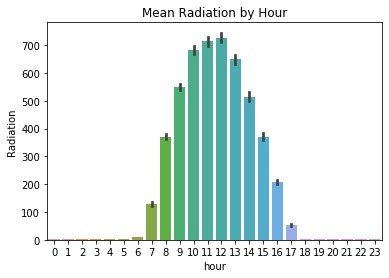

In [22]:
sns.barplot(x="hour", y='Radiation', data=df)
plt.title('Mean Radiation by Hour')
plt.show()

Monthly Average Radiation

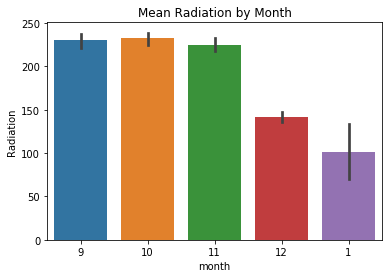

In [24]:
sns.barplot(x="month", y='Radiation', data=df, order=[9,10,11,12,1])
plt.title('Mean Radiation by Month')
plt.show()

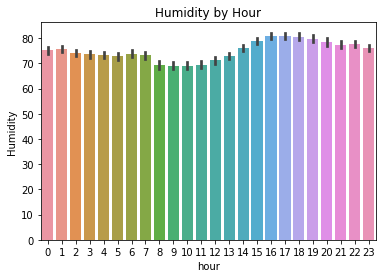

In [25]:
sns.barplot(x="hour", y='Humidity', data=df)
plt.title('Humidity by Hour')
plt.show()

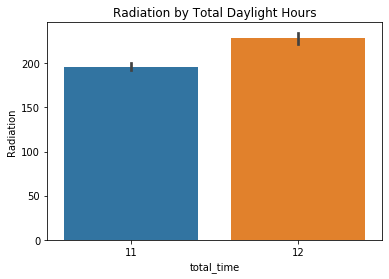

In [35]:
sns.barplot(x="total_time", y='Radiation', data=df)
plt.title('Radiation by Total Daylight Hours')
plt.show()

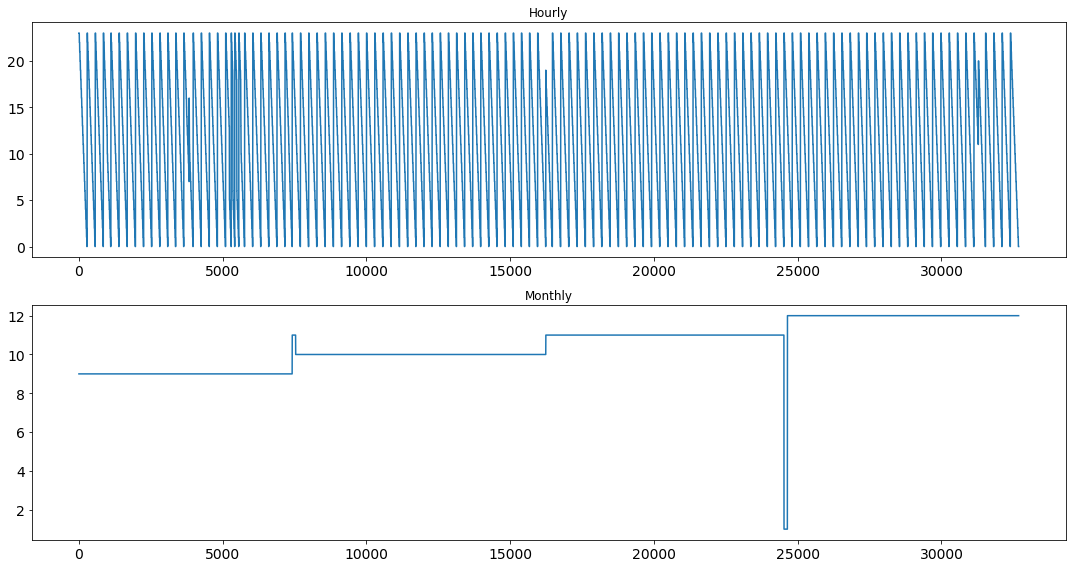

In [34]:
ig,axs = plt.subplots(2,1)

df['hour'].plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])

df['month'].plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[1])
plt.tight_layout()

# Linear Model Prediction

In [36]:
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv',], axis=1)
y = df['Radiation']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 4.48997713e-05  4.42923473e+01 -4.52596162e+02  5.59693278e-01
 -2.27956202e-01  5.45484590e+00 -7.60686180e+00 -8.06571415e+01
 -9.11417994e+02 -4.75211561e+01]


In [43]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

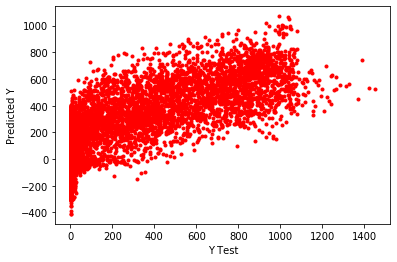

In [69]:
plt.scatter(y_test,predictions, marker='.', c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 147.08977278166788
MSE: 37421.93079865785
RMSE: 193.4474884785477


In [71]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
UNIXTime,0.000045
Temperature,44.292347
Pressure,-452.596162
Humidity,0.559693
WindDirection(Degrees),-0.227956
Speed,5.454846
hour,-7.606862
month,-80.657142
year,-911.417994
total_time,-47.521156
